Perform Hierarchical Drift-Diffusion Modeling of the StateSwitch Dynamic Responses using the HDDM toolbox

Note that for some reason, the saving of models only works when running the script in Python 2.
The following commands can be used to switch between the two python installations in the terminal.

source activate py27
source activate py36

It should also be possible to switch between kernels in Jupyter Notebook.

In [20]:
# Script was originally run using Python 3
# Run the following command in Terminal to install HDDM package
# conda install -c pymc hddm

import hddm
print("HDDM version: "+ hddm.__version__)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version: "+ np.__version__) # version <=1.11 necessary for pymc2 (https://groups.google.com/forum/#!topic/hddm-users/Jdwm_IoJk5U)

import scipy.io as io

import warnings
warnings.filterwarnings('ignore')
print("Important: Warnings disabled for improved clarity")

import pickle

def savePatch(self, fname):
    with open(fname, 'wb') as f:
        pickle.dump(self, f)
        
def loadPatch(self, fname):
    with open(fname, 'rb') as f:
        pickle.load(self, f)


HDDM version: 0.6.0
Numpy version: 1.14.0
Important: Warnings disabled for improved clarity


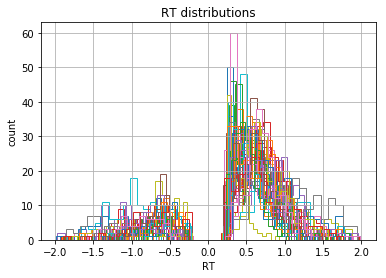

In [21]:
# get data from numpy structured array

group = 'YA'

dataPath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/';
csvData = dataPath+'StateSwitchDynamicTrialData_EEG_'+group+'.dat';

savePath = '/Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEG3/'

########################
## Load and flip data ##
########################

data = hddm.load_csv(csvData)
data.rename(columns={'acc':'response'}, inplace=True)
data.rename(columns={'subject':'subj_idx'}, inplace=True)

dataFlipped = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dataFlipped.groupby('subj_idx'):
    subj_data.rt.hist(bins=40, histtype='step', ax=ax)
    

# Model with varying drift rate and NDT + z variation

In [77]:
m_stim_v_t_z = hddm.HDDM(data, include=('z'), depends_on={'v': ['dim'], 't': ['dim'], 'z': ['dim']}, group_only_nodes={'z': ['dim']}, p_outlier=.05)
m_stim_v_t_z.find_starting_values()
m_stim_v_t_z.sample(7000, burn=5000, dbname='traces.db', db='pickle')
print('Model m_stim_v_t_z will be saved at: '+ savePath+'m_stim_v_t_z')
m_stim_v_t_z.savePatch = savePatch(m_stim_v_t_z, savePath+'m_stim_v_t_z')
# save individual results as CSV
dataMat = m_stim_v_t_z.get_traces()
fileName = 'm_stim_v_t_z.csv'
print('Data will be saved at: '+ savePath+fileName)
dataMat.to_csv(savePath+fileName, sep='\t')

 [-----------------100%-----------------] 7000 of 7000 complete in 997.3 secModel m_stim_v_t_z will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEG3/m_stim_v_t_z
Data will be saved at: /Volumes/LNDG/Projects/StateSwitch/dynamic/data/behavior/STSW_dynamic/D_DDM/B_data/EEG3/m_stim_v_t_z.csv


Compare DICs

In [78]:
print("Model varying v t z DIC: %f" % m_stim_v_t_z.dic)

Model varying v t z DIC: 6797.148508


Text(0,0.5,'Posterior probability')

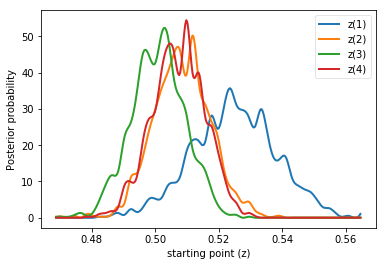

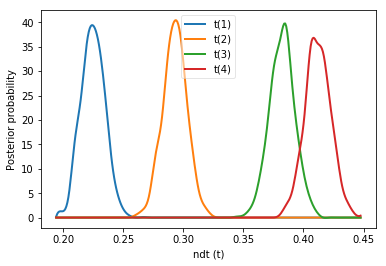

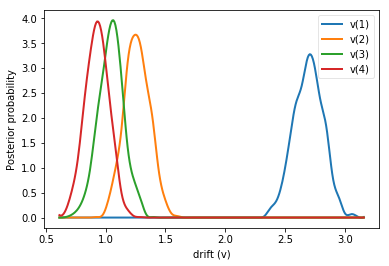

In [79]:
# starting point z YA
z_11,z_12,z_13,z_14 = m_stim_v_t_z.nodes_db.node[['z(1)', 'z(2)', 'z(3)','z(4)']]
hddm.analyze.plot_posterior_nodes([z_11,z_12,z_13,z_14])
#plt.xlim(0.21, 0.45)
plt.xlabel('starting point (z)')
plt.ylabel('Posterior probability')

# starting point z YA
t_11,t_12,t_13,t_14 = m_stim_v_t_z.nodes_db.node[['t(1)', 't(2)', 't(3)','t(4)']]
hddm.analyze.plot_posterior_nodes([t_11,t_12,t_13,t_14])
#plt.xlim(0.21, 0.45)
plt.xlabel('ndt (t)')
plt.ylabel('Posterior probability')

# starting point z YA
v_11,v_12,v_13,v_14 = m_stim_v_t_z.nodes_db.node[['v(1)', 'v(2)', 'v(3)','v(4)']]
hddm.analyze.plot_posterior_nodes([v_11,v_12,v_13,v_14])
#plt.xlim(0.21, 0.45)
plt.xlabel('drift (v)')
plt.ylabel('Posterior probability')

In [69]:
m_stim_v_t_z = pickle.load(open(savePath+'m_stim_v_t_z', 'rb'))

Plotting a
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std
Plotting z(1)
Plotting z(2)
Plotting z(3)
Plotting z(4)


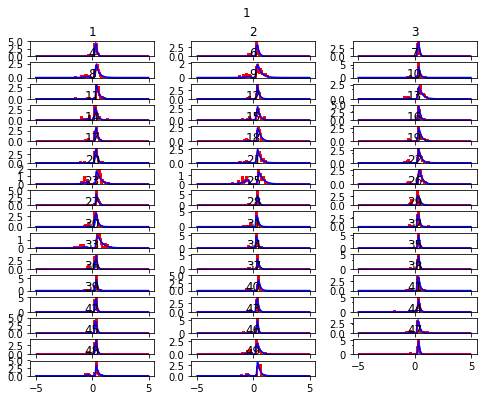

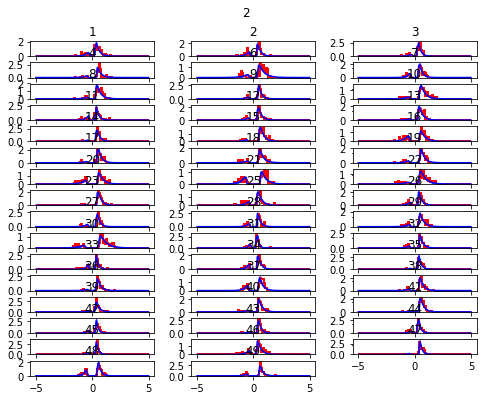

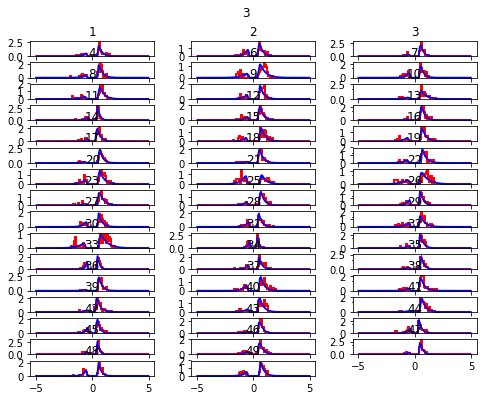

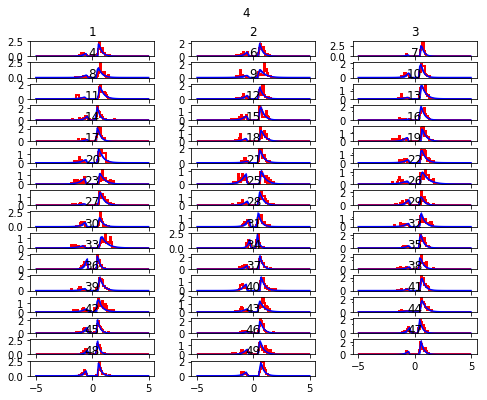

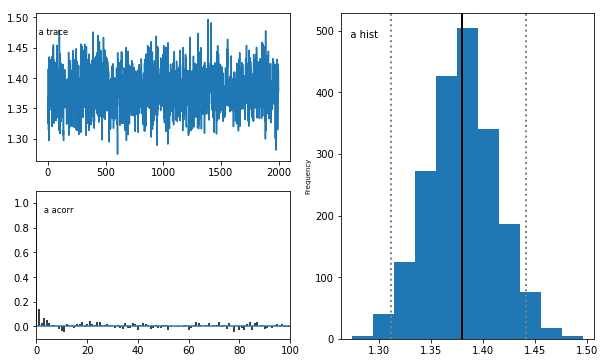

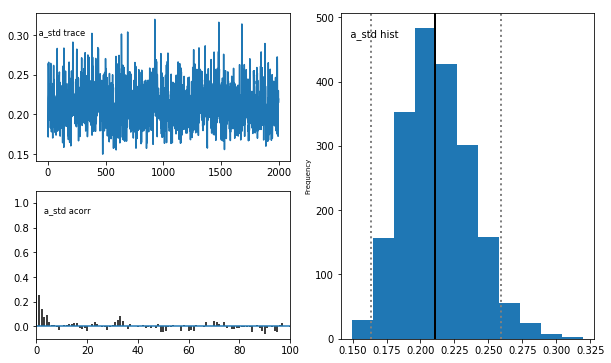

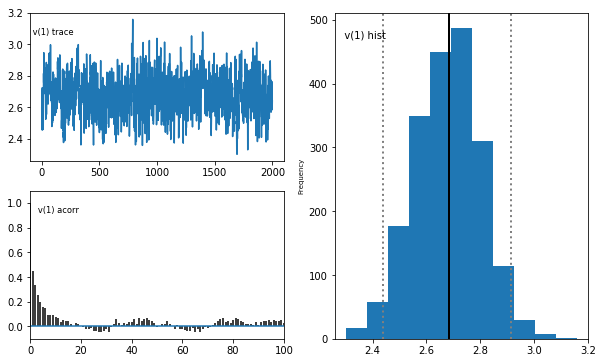

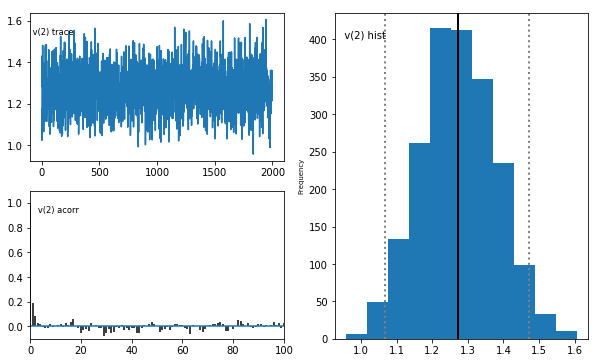

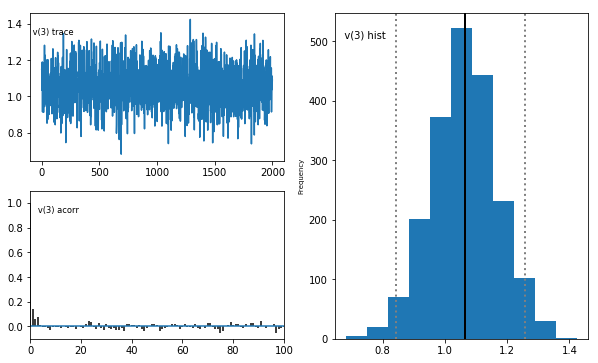

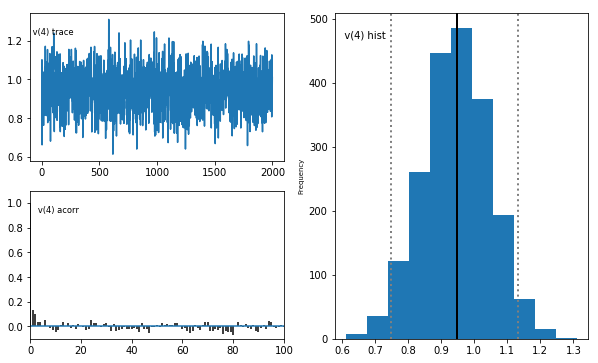

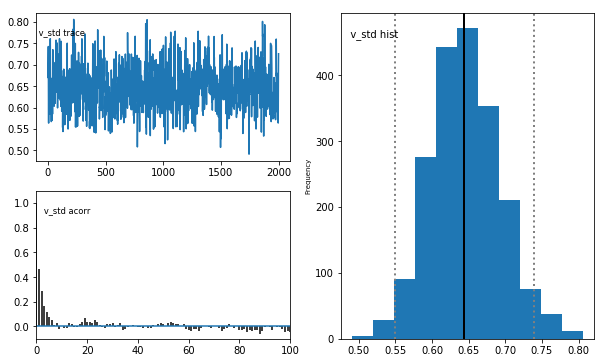

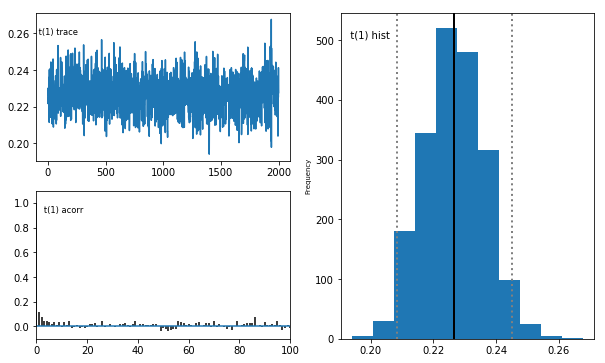

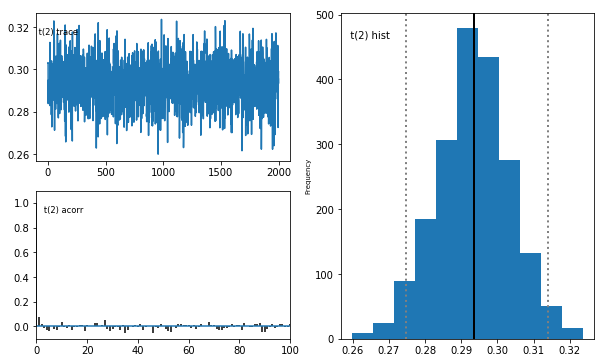

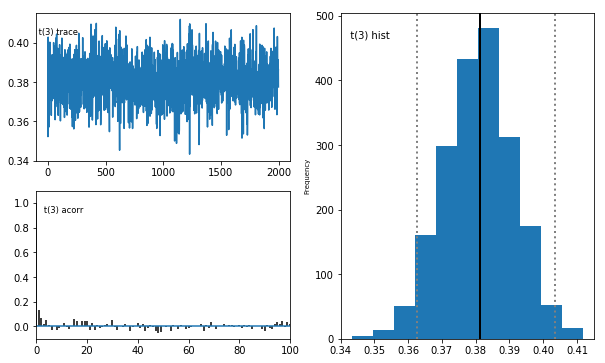

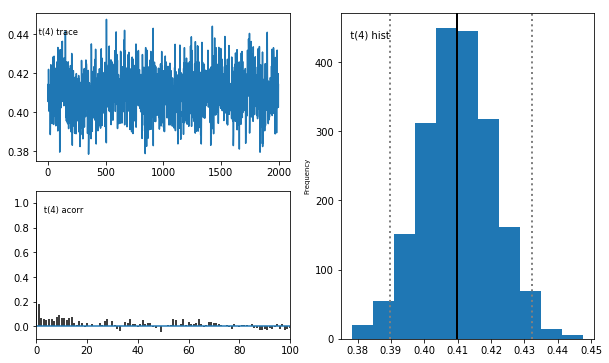

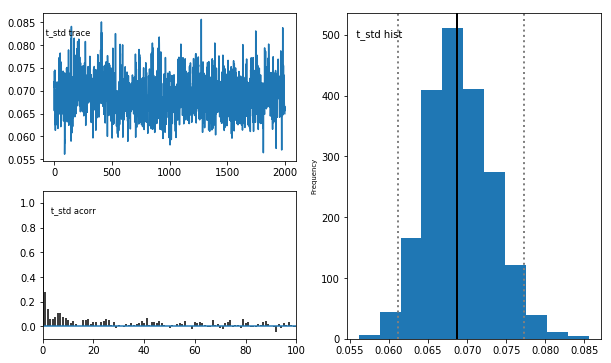

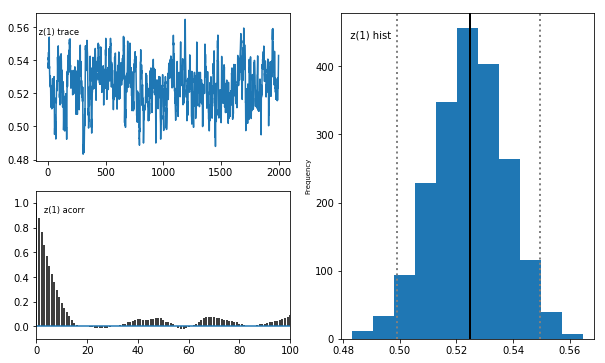

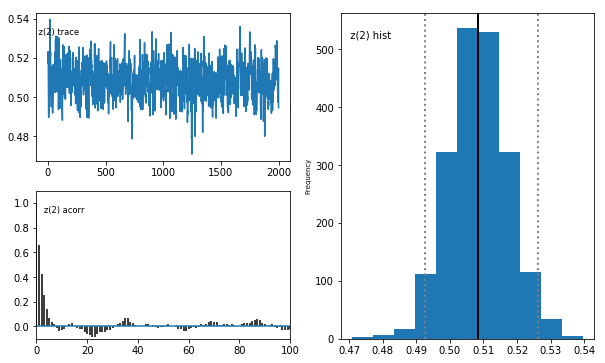

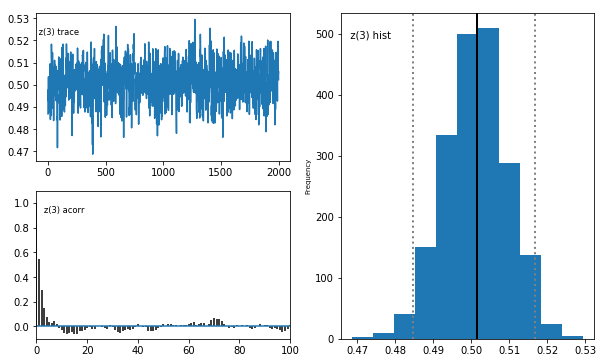

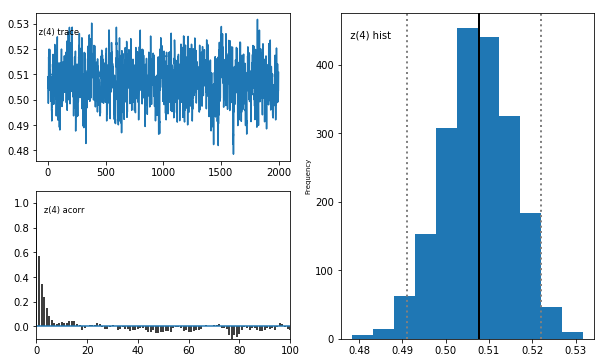

In [80]:
m_stim_v_t_z.plot_posterior_predictive()
m_stim_v_t_z.plot_posteriors()